

##  <br><div style="text-align:center"><span style="color:black; font-family:Georgia; font-size:29px;"> Vilnius Residents & Restaurant analysis.



## <div style="text-align:center"><span style="color:black; font-family:Georgia; font-size:15px;">By Petter Näslund</span></div>

![]<img src="http://blog.parkinn.fr/wp-content/uploads/sites/4/2015/12/Vilnius-banner.jpg" width="800" />

<br><div style="text-align:center"><span style="color:black; font-family:Georgia; font-size:29px;">Welcome to Vilnius!</span></div>
<br>
<span style="color:black; font-family:Georgia; font-size:16px;"> Vilnius is a town that has grown very rapidly during the past years. More and more businesses are relocating to Vilnius, and it a popular destination due to it’s beautiful old town, friendly people, and vibrant restaurant scene.<br>

<span style="color:black; font-family:Georgia; font-size:16px;">The most visited parts of Vilnius for tourists to visit is of course the center,  especially Old town. <br>    
Many new restaurants are popping up, and many are closing down. The long-living restaurants as per today are typically those that have been existing for a long time, while newer restaurants are sometimes struggling to remain profitable.</span>
</span>




 <br>
 <div style="text-align:center"><span style="color:black; font-family:Georgia; font-size:20px;, font-weight:bold">So what are the questions that we want to find answers to during this project? </span></div>

<br>
<span style="color:black; font-family:Georgia; font-size:16px;"> This project is meant to give some insights regarding the population of Vilnius, and also some information regarding the resturant scene. Some of the questions I will try to provide answers to are the following:

- <span style="color:black; font-family:Georgia; font-size:16px;"> 
What are the ages of people Living in Vilnius?
- <span style="color:black; font-family:Georgia; font-size:16px;"> 
    Where is the population of Vilnius coming from?
- <span style="color:black; font-family:Georgia; font-size:16px;"> 
    What are the biggest districts of Vilnius?
- <span style="color:black; font-family:Georgia; font-size:16px;"> 
    What are the most common venues in Vilnius biggest districts?
    

<span style="color:black; font-family:Georgia; font-size:16px;"> So if you are interested about the different restaurants available in Vilnius, or if you are curious about the population of Vilnius, keep reading!

#### <div style="text-align:center"><span style="color:black; font-family:Georgia; font-size:20px;">Data used for this project: </span></div>

- <span style="color:black; font-family:Georgia; font-size:16px;"> 
  For this research, I will be using data collected from several different sources. All location data that I'm using to get information regarding the different restaurants and venues in Vilnius, I will be collecting using [Foursquare](https://foursquare.com)  API's. </span> <br> <br>
    
- <span style="color:black; font-family:Georgia; font-size:16px;">  I will also be using public available data from [Vilnius Municipality](https://github.com/vilnius), in order to get a better understanding on where the locals are living. 
From this page I will get a dataset available as a CSV file, that contains various data regarding citizens registered in Vilnius. 

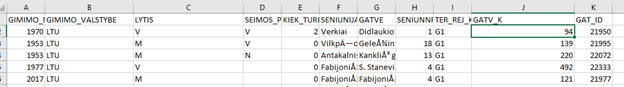
<br>
<br>
<br>
<br>


- <span style="color:black; font-family:Georgia; font-size:16px;">I will also be using a geojson file that I got from [this](https://hub.arcgis.com/datasets/vplanas::vilniaus-miesto-seni%C5%ABnij%C5%B3-ribos) website, in order to create my maps of Vilnius.
    
<br>
<br>
<br>
<br>
<br>
<br>



# Lets get started by importing some of the libraries we will be using during this project.

In [1]:
#Importing required libraries.
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np 
import folium
print('Libraries imported.')

Libraries imported.


### Loading and analysing the resident file provided by Vilnius Municipality.

In [2]:
#Loading the CSV into a dataframe.
df_resident = pd.read_csv('regpep.csv')

In [3]:
#Checking the columns and data inside the columns. One row for every person registered in Vilnius.
df_resident.head()

,GIMIMO_METAI,GIMIMO_VALSTYBE,LYTIS,SENIUNIJA
0,1970,LTU,V,Verkiai
1,1953,LTU,M,Vilkpėdė
2,1953,LTU,M,Antakalnis
3,1977,LTU,V,Fabijoniškės
4,2017,LTU,M,Fabijoniškės


In [4]:
#Checking how many rows (people registered in Vilnius)
df_resident.shape
#917544 rows = 917544 people registered in Vilnius.

(917544, 4)

In [5]:
#Checking the datatypes of each column.
df_resident.dtypes

GIMIMO_METAI        int64
GIMIMO_VALSTYBE    object
LYTIS              object
SENIUNIJA          object
dtype: object

# Preprocessing the data.

In [6]:
#Renaming the columns. Translating into english, and making them more understandable.
df_resident.rename(columns={'GIMIMO_METAI':'AGE', 'GIMIMO_VALSTYBE':'Birth_country', 'LYTIS':'Gender', 'SENIUNIJA':'District'}, inplace = True)

In [7]:
#Instead of having birth year - I will convert it to a number showing age.
df_resident['AGE'] = 2019 - df_resident['AGE']  

In [8]:
#Checking the first 5 rows of the dataframe.
df_resident.head()

,AGE,Birth_country,Gender,District
0,49,LTU,V,Verkiai
1,66,LTU,M,Vilkpėdė
2,66,LTU,M,Antakalnis
3,42,LTU,V,Fabijoniškės
4,2,LTU,M,Fabijoniškės


In [9]:
#Creating a new column to the dataframe, where I group the persons into different age spans instead. WIll make visualiuzations better.
#Here binning the different values into labels.
bins = [0, 17, 30, 40, 60, 70, 100]
group_names = ['Under 18', '18-30 yrs', '30 - 40 yrs', '40-60yrs', '60-70yrs', '70-100yrs']


In [10]:
#Creating the new columns
df_resident['AgeGroup'] = pd.cut(df_resident.AGE, bins, labels=group_names)

In [11]:
df_resident.head()

,AGE,Birth_country,Gender,District,AgeGroup
0,49,LTU,V,Verkiai,40-60yrs
1,66,LTU,M,Vilkpėdė,60-70yrs
2,66,LTU,M,Antakalnis,60-70yrs
3,42,LTU,V,Fabijoniškės,40-60yrs
4,2,LTU,M,Fabijoniškės,Under 18


In [12]:
#Checking some quick stats about the ages.
df_resident.describe()

,AGE
count,917544.000000
mean,46.434365
std,21.645894
min,0.000000
25%,33.000000
50%,47.000000
75%,62.000000
max,110.000000


In [13]:
#Getting all of the AgeGroups to it's own dataframe, in order to do some visualization.
df_age = df_resident.groupby('AgeGroup').AGE.count()

##  Plotting the numbers to get a better understanding of the data.


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

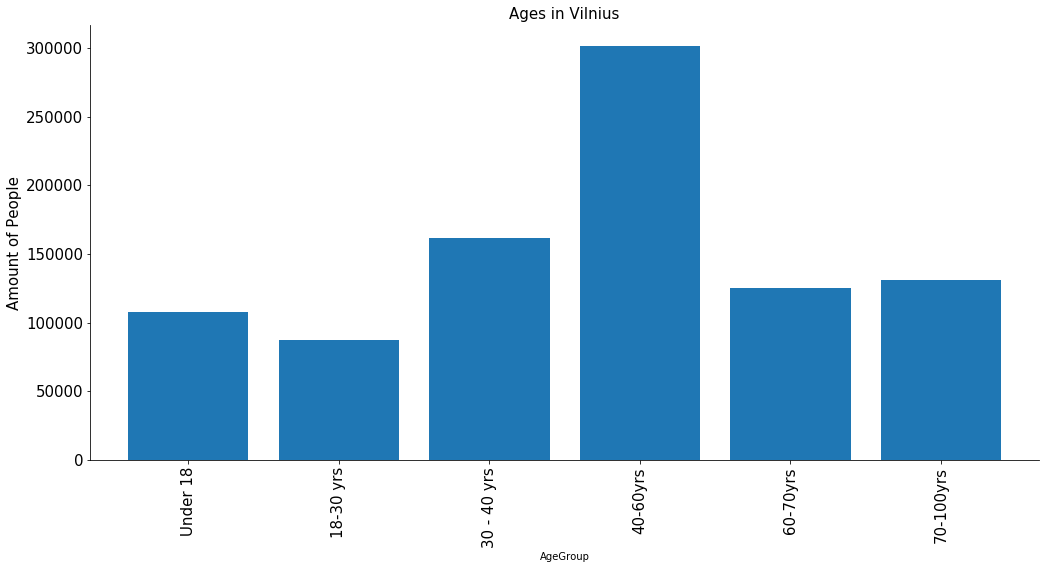

In [16]:
ax = df_age.plot(kind='bar',
                   figsize=(17,8),
                   width=0.8,                   
                   fontsize=15)


ax.set_title("Ages in Vilnius", fontsize=15)
plt.ylabel('Amount of People', fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.xticks(fontsize=15)


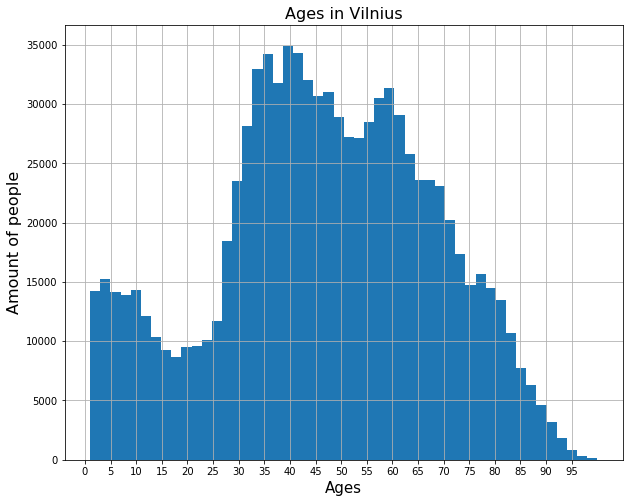

In [17]:
plt.figure(figsize=(10,8))
df_resident['AGE'].plot(kind='hist',
           range=(1,100),
           bins=50,
           histtype='bar',
           grid=True)
plt.xticks(range(0,100,5))
plt.title('Ages in Vilnius', fontsize=16)
plt.ylabel('Amount of people',fontsize=16)
plt.xlabel('Ages', fontsize=15, rotation=0)

plt.show()

<br>
<span style="color:black; font-family:Georgia; font-size:20px;"> 
So we have found out that the avarage age of citizens in Vilnius is 46 years old. </span><br> 
 
<span style="color:black; font-family:Georgia; font-size:20px;">  
We have also found out that most people in Vilnius are between 40-60 years old.
 There are more kids under 18, than people between 18-30 years old.
<br>
<br>
<br>

# Lets find out where most of the people are living.

In [18]:
#Creating a new dataframe, showing amount of cizitens per district.
#Also sorting by count value, and resetting the index.
df_perdist = df_resident.groupby('District').District.count()
df_perdist = df_perdist.reset_index(name='count')
df_perdist.sort_values(by='count', ascending = False, inplace = True)
df_perdist.reset_index(inplace = True)
df_perdist.drop(['index'], axis=1, inplace = True)
df_perdist.head(10)

,District,count
0,Verkiai,77744
1,Žirmūnai,72547
2,Antakalnis,63801
3,Fabijoniškės,61941
4,Pašilaičiai,61533
5,Naujoji Vilnia,59129
6,Lazdynai,51785
7,Naujininkai,50969
8,Šeškinė,49656
9,Naujamiestis,47957


# For this project, we will be focusing on people between 18- 50. So cleaning data to get rid of the others

In [19]:
#Creating a new dataframe, only containing people between 18-50 years old.
df_targetres = df_resident.copy()
df_targetres['AGE'] = df_targetres[(df_targetres['AGE'] >= 18) & (df_targetres['AGE'] <= 50)]

In [20]:
#Since this left us with a bunch of NaNs, I'm removing those rows.
df_targetres.dropna(inplace = True)
df_targetres.reset_index(inplace = True)
df_targetres.drop(['index'], axis=1, inplace = True)

In [21]:
#Creating a new dataframe, showing where most people between 18-50 are living.
df_targetdist = df_targetres.groupby('District').District.count()
df_targetdist = df_targetdist.reset_index(name='count')
df_targetdist.sort_values(by='count', ascending = False, inplace = True)
df_targetdist.reset_index(inplace = True)
df_targetdist.drop(['index'], axis=1, inplace = True)

In [22]:
df_targetdist.head(10)

,District,count
0,Verkiai,38462
1,Pašilaičiai,31078
2,Žirmūnai,29637
3,Antakalnis,27735
4,Fabijoniškės,27505
5,Naujoji Vilnia,26170
6,Naujamiestis,23299
7,Lazdynai,21539
8,Naujininkai,20804
9,Pilaitė,20405


## Getting the coordinates for each district - in order to plot on a map.

In [23]:
#I will need to get the coordinates for each district, in order to it on a map. Creating a new column with this data.
#In order to get the coordinates, I'm using Nominatim.
from geopy.geocoders import Nominatim  
geolocator = Nominatim(user_agent='vilnius_dist')
df_targetdist['District_coordinates'] = df_targetdist['District'].apply(geolocator.geocode).apply (lambda x: (x.latitude, x.longitude))

In [24]:
df_targetdist.head()

,District,count,District_coordinates
0,Verkiai,38462,"(54.7506573, 25.2947674)"
1,Pašilaičiai,31078,"(54.7284868, 25.2289162)"
2,Žirmūnai,29637,"(54.7111722, 25.2988095)"
3,Antakalnis,27735,"(54.7056388, 25.3145377)"
4,Fabijoniškės,27505,"(54.7264112, 25.2492422)"


##  Separating the coordinates, placing latitude and longitude into their own column.

In [25]:
#I'm gonna have to seperate the latitude and longtitude to seperate columns in order to plot them easier..
df_targetdist[['Latitude', 'Longitutde']] = df_targetdist['District_coordinates'].apply(pd.Series).astype(float)

In [26]:
df_targetdist.head(20)

,District,count,District_coordinates,Latitude,Longitutde
0,Verkiai,38462,"(54.7506573, 25.2947674)",54.750657,25.294767
1,Pašilaičiai,31078,"(54.7284868, 25.2289162)",54.728487,25.228916
2,Žirmūnai,29637,"(54.7111722, 25.2988095)",54.711172,25.298810
3,Antakalnis,27735,"(54.7056388, 25.3145377)",54.705639,25.314538
4,Fabijoniškės,27505,"(54.7264112, 25.2492422)",54.726411,25.249242
5,Naujoji Vilnia,26170,"(54.695211, 25.4030535)",54.695211,25.403053
6,Naujamiestis,23299,"(55.6868969, 24.1523154)",55.686897,24.152315
7,Lazdynai,21539,"(54.6760345, 25.2099318)",54.676035,25.209932
8,Naujininkai,20804,"(54.6612223, 25.2718256)",54.661222,25.271826
9,Pilaitė,20405,"(54.7056763, 25.1835024)",54.705676,25.183502


In [27]:
#The coordinates for Naujamiestis is off. Correcting it below:
df_targetdist.iloc[6, df_targetdist.columns.get_loc('Latitude')] = 54.6795082
df_targetdist.iloc[6, df_targetdist.columns.get_loc('Longitutde')] =  25.2685509

In [28]:
#Saving the full coordinates, as a backup
cord_backup = df_targetdist['District_coordinates']

In [29]:
#With the longitude and latitudes coordinates in place, I'm dropping the column containing full coordinates.
df_targetdist.drop(['District_coordinates'], axis=1, inplace = True)

In [30]:
#Renaning the count column so it makes more sense.
df_targetdist.rename(columns={'count':'Residents'}, inplace = True)

# Lets start by creating a map of Vilnius, and there after marking all different districts.

In [31]:
# First step will be to get the coordinates for Vilnius.
address = 'Vilnius, Lithuania'
geolocator = Nominatim(user_agent='viln_dist')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of the City of Vilnius are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of the City of Vilnius are 54.6870458, 25.2829111.


In [32]:
#Creating a map showing Vilnius, using the coordinates from Nominatim.
map_vilnius = folium.Map(location=[latitude, longitude], zoom_start=11)

#Adding markers on the map, showing where each district is located - using the longitude and latitude column
for lat, lng, label in zip(df_targetdist['Latitude'], df_targetdist['Longitutde'], df_targetdist['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vilnius)  
    
map_vilnius

## Great.  Lets visualize where most of the people are living, using a Choropleth map.

In [33]:
#Possible to zoom on the map, and to click the marker to see which district it is.
map_vilnius.choropleth(

geo_data='https://opendata.arcgis.com/datasets/6d5088b44dba4643a6611455d5352268_1.geojson',

data=df_targetdist,

columns=['District', 'Residents'],

key_on='feature.properties.SENIUNIJA',

fill_color='YlOrRd',

fill_opacity=0.7,

line_opacity=0.5,

legend_name='Vilnius residents per district',
   


)
for lat, lng, label in zip(df_targetdist['Latitude'], df_targetdist['Longitutde'], df_targetdist['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vilnius)  

map_vilnius

# Diversity of Vilnius

### Great. So we now where our target population is living. as mentioned before - many people are imigrating to Vilnius. Where are the majority of people coming from?

In [34]:
#Creating a new dataframe, showing where people are coming from.
df_countries = df_resident.groupby('Birth_country').Birth_country.count()
df_countries = df_countries.reset_index(name='count')
df_countries.sort_values(by='count', ascending = False, inplace = True)
df_countries.reset_index(inplace = True)
df_countries.drop(['index'], axis=1, inplace = True)


In [35]:
df_countries.set_index('Birth_country', inplace = True)

In [36]:
df_countries.head(20)

,count
Birth_country,
LTU,812119
BLR,40884
RUS,33919
UKR,11598
KAZ,2397
LVA,2148
GBR,1922
DEU,1196
POL,1094


#  Now when we have some analysis done on Vilnius resident's - lets check out how the restaurant scene looks like.

In [552]:
#Importing additional required libraries.
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import requests # library to handle requests

#In order to connect to Foursquare API.
CLIENT_ID = 'F35ANHGVOAPSUJONBKYCORPYO0HZDPK2TEE0VDJ010Q2DG1K' 
CLIENT_SECRET = 'O3WZAT45SFHWDEWPHWBH1XLWQA533BPUZGB1UNOWT5JV4JAI' 
VERSION = '20180605' 
LIMIT = 100 # I will only work with the 100 closest venues

In [553]:
#Defining a function, so that I can easily call the API.
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
        
    return(nearby_venues)

## First, lets look at the center of Vilnius - Senamiestis.  Here I'm getting 100 Venues.

In [554]:
#Creating a new dataframe, only containing information regarding Senamiestis.
df_oldtown = df_targetdist[df_targetdist.District=='Senamiestis'].reset_index(drop=True)

In [555]:
#Getting nearby venues from Senamiestis.
old_venues = getNearbyVenues(names=df_oldtown['District'],
                                   latitudes=df_oldtown['Latitude'],
                                   longitudes=df_oldtown['Longitutde']
                                  )

Senamiestis


In [556]:
#How many different categories for venues do we have in the 100 returned?
print('There are {} unique categories.'.format(len(old_venues['Venue Category'].unique())))

There are 50 unique categories.


In [557]:
#This is the ones with a venue category that contains "restaurant" that I got from the API.
old_rest = old_venues[old_venues['Venue Category'].str.contains('Rest')].copy()
old_rest.reset_index()


,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Senamiestis,54.681873,25.288404,Saint Germain,54.682331,25.291274,French Restaurant
1,5,Senamiestis,54.681873,25.288404,El Mercado,54.680380,25.288366,Spanish Restaurant
2,11,Senamiestis,54.681873,25.288404,Kitchen,54.679723,25.287852,Modern European Restaurant
3,23,Senamiestis,54.681873,25.288404,Ertlio namas,54.682029,25.287556,Restaurant
4,27,Senamiestis,54.681873,25.288404,Fiorentino,54.682097,25.286117,Italian Restaurant
5,34,Senamiestis,54.681873,25.288404,Etno Dvaras,54.683408,25.289377,Eastern European Restaurant
6,36,Senamiestis,54.681873,25.288404,Amandus,54.681819,25.289239,Restaurant
7,38,Senamiestis,54.681873,25.288404,Šv. Vieta,54.681509,25.284614,Vegetarian / Vegan Restaurant
8,45,Senamiestis,54.681873,25.288404,René,54.680006,25.285850,Belgian Restaurant
9,47,Senamiestis,54.681873,25.288404,Cozy,54.681301,25.285270,Restaurant


In [558]:
print('There are {} restaurants.'.format(len(old_rest['Venue'].unique())))

There are 22 restaurants.


In [559]:
#Checking the bars.
old_bar=old_rest = old_venues[old_venues['Venue Category'].str.contains('Bar')].copy()

In [560]:
print('There are {} bars.'.format(len(old_rest['Venue'].unique())))

There are 11 bars.


<br>
<br>
<span style="color:black; font-family:Georgia; font-size:20px;"> So this shows that from the 100 different venues I grabbed using Foursquares API, there are 22 restaurants, and 11 bars in Senamiestes. Please note that this is from foursquare, and the ones I grabbed from the 100 nearest venues. So in reality- there is of course more. <br>
<br>
Foursqaure also uses categories like "Burger Join" / "Pizza Place", categories that doesn't contain "Restaurant.
For the restaurants, I'm only taking categories that include the word "restaurant".


<br>
<br>
<br>

# Lets check how it looks like in the 10 districts where most people are living.

In [561]:
#Creating a new dataframe, containing the 10 districts where most people are living.
top_dist = df_targetdist.head(10)

In [562]:
#Grabbing the data from foursquare for these districts.
top_dist_venues = getNearbyVenues(names=top_dist['District'],
                                   latitudes=top_dist['Latitude'],
                                   longitudes=top_dist['Longitutde']
                                  )

Verkiai
Pašilaičiai
Žirmūnai
Antakalnis
Fabijoniškės
Naujoji  Vilnia
Naujamiestis
Lazdynai
Naujininkai
Pilaitė


In [656]:
top_dist_venues.head(50)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Verkiai,54.750657,25.294767,Verkių regioninis parkas | Verkiai Regional park,54.751579,25.293919,Park
1,Verkiai,54.750657,25.294767,Verkių dvaro rūmai,54.748114,25.292627,History Museum
2,Verkiai,54.750657,25.294767,Verkių dvaro apžvalgos aikštelė,54.746987,25.292420,Scenic Lookout
3,Pašilaičiai,54.728487,25.228916,Wraperia Suppa Kebs Laisvės pr.,54.728814,25.235940,Fast Food Restaurant
4,Pašilaičiai,54.728487,25.228916,JAMMI Kebabai ir buritos,54.729504,25.227184,Kebab Restaurant
5,Pašilaičiai,54.728487,25.228916,RIMI,54.729894,25.227426,Shopping Mall
6,Pašilaičiai,54.728487,25.228916,Pizzart,54.725612,25.232892,Pizza Place
7,Pašilaičiai,54.728487,25.228916,Pašilaičių žiedas,54.728210,25.233982,Bus Station
8,Pašilaičiai,54.728487,25.228916,Vaikutis,54.727817,25.235381,Toy / Game Store
9,Žirmūnai,54.711172,25.298810,Vynoteka,54.711088,25.298518,Wine Shop


In [564]:
print('There are {} unique categories.'.format(len(top_dist_venues['Venue Category'].unique())))

There are 78 unique categories.


## Time to do some onehotencoding to get a better understanding of the different categories.

In [565]:
# one hot encoding
viltown_onehot = pd.get_dummies(top_dist_venues[['Venue Category']], prefix="", prefix_sep="")

# Adding Neighborhood column, and moving to be the first
viltown_onehot['Neighborhood'] = top_dist_venues['Neighborhood']
viltown_onehot = viltown_onehot[ ['Neighborhood'] + [ col for col in viltown_onehot.columns if col != 'Neighborhood' ] ]

In [566]:
#Creating a new dataframe.
viln_grouped = viltown_onehot.groupby('Neighborhood').mean().reset_index()

In [567]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#run it for the dataframe
import numpy as np

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


In [568]:
# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['Neighborhood'] = viln_grouped['Neighborhood']

for ind in np.arange(viln_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(viln_grouped.iloc[ind, :], num_top_venues)

In [732]:
#Showing most common venues for these districts.
district_venues_sorted.head(25)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Antakalnis,Gym / Fitness Center,Pizza Place,Clothing Store,Tea Room,Pharmacy
1,Fabijoniškės,Gym,Beer Store,Pool Hall,Gym / Fitness Center,Chinese Restaurant
2,Lazdynai,Gym,Grocery Store,Pizza Place,Caucasian Restaurant,Electronics Store
3,Naujamiestis,Chinese Restaurant,Hotel,Restaurant,Pizza Place,Coffee Shop
4,Naujininkai,Grocery Store,Convenience Store,Arcade,Gym / Fitness Center,Paintball Field
5,Naujoji Vilnia,Bookstore,Thrift / Vintage Store,Fast Food Restaurant,Construction & Landscaping,Gay Bar
6,Pašilaičiai,Toy / Game Store,Shopping Mall,Fast Food Restaurant,Kebab Restaurant,Pizza Place
7,Pilaitė,Grocery Store,Turkish Restaurant,Gym,Pizza Place,Restaurant
8,Verkiai,History Museum,Scenic Lookout,Park,Comfort Food Restaurant,Convenience Store
9,Žirmūnai,Pizza Place,Bakery,Pharmacy,Clothing Store,Coffee Shop


 #### We can clearly see that people in Antakalnis, Fabijoniškės and Lazdynai should be very fit.








# Checking the top 5 districts.

## Starting with Verkiai

In [640]:
df_verkiai = df_targetdist[df_targetdist.District=='Verkiai'].reset_index(drop=True)

In [641]:
verkiai_venues = getNearbyVenues(names=df_verkiai['District'],
                                   latitudes=df_verkiai['Latitude'],
                                   longitudes=df_verkiai['Longitutde']
                                  )

Verkiai


In [675]:
verk_rest = verkiai_venues[verkiai_venues['Venue Category'].str.contains('Rest')].copy()
verk_rest.reset_index()
print('There are {} restaurants.'.format(len(verk_rest['Venue'].unique())))


There are 0 restaurants.


In [689]:
verkiai_venues.head(50)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Verkiai,54.750657,25.294767,Verkių regioninis parkas | Verkiai Regional park,54.751579,25.293919,Park
1,Verkiai,54.750657,25.294767,Verkių dvaro rūmai,54.748114,25.292627,History Museum
2,Verkiai,54.750657,25.294767,Verkių dvaro apžvalgos aikštelė,54.746987,25.292420,Scenic Lookout


<br>
<span style="color:black; font-family:Georgia; font-size:16px;"> What strikes me at first, is that there is not a single restaurant found by foursquare in the most populated district of Vilnius. However, this seems like a nice place to live if you enjoy parks and museums.
    
<br>
<br>
<br>

##  Next up - Pašilaičiai

In [649]:
df_pasi = df_targetdist[df_targetdist.District=='Pašilaičiai'].reset_index(drop=True)

In [650]:
pasi_venues = getNearbyVenues(names=df_pasi['District'],
                                   latitudes=df_pasi['Latitude'],
                                   longitudes=df_pasi['Longitutde']
                                  )

Pašilaičiai


In [673]:
pasi_rest = pasi_venues[pasi_venues['Venue Category'].str.contains('Rest')].copy()
pasi_rest.reset_index()
print('There are {} restaurants.'.format(len(pasi_venues['Venue'].unique())))


There are 6 restaurants.


In [707]:
pasi_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Pašilaičiai,54.728487,25.228916,Wraperia Suppa Kebs Laisvės pr.,54.728814,25.235940,Fast Food Restaurant
1,Pašilaičiai,54.728487,25.228916,JAMMI Kebabai ir buritos,54.729504,25.227184,Kebab Restaurant
2,Pašilaičiai,54.728487,25.228916,RIMI,54.729894,25.227426,Shopping Mall
3,Pašilaičiai,54.728487,25.228916,Pizzart,54.725612,25.232892,Pizza Place
4,Pašilaičiai,54.728487,25.228916,Pašilaičių žiedas,54.728210,25.233982,Bus Station


<br>
<br>
<br>
<span style="color:black; font-family:Georgia; font-size:16px;"> Pašilaičiai seems like a nice place. There are 6 venue categories that has the word 'restaurant' in it. Seems to be a nice district.
    
<br>
<br>

##  Lets check Žirmūnai

In [691]:
df_zir = df_targetdist[df_targetdist.District=='Žirmūnai'].reset_index(drop=True)

In [692]:
zir_venues = getNearbyVenues(names=df_zir['District'],
                                   latitudes=df_zir['Latitude'],
                                   longitudes=df_zir['Longitutde']
                                  )

Žirmūnai


In [709]:
zir_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Žirmūnai,54.711172,25.29881,Vynoteka,54.711088,25.298518,Wine Shop
1,Žirmūnai,54.711172,25.29881,Assorti.lt,54.713243,25.296698,Supermarket
2,Žirmūnai,54.711172,25.29881,Skypark,54.713244,25.296487,Gaming Cafe
3,Žirmūnai,54.711172,25.29881,Jurgis ir Drakonas,54.713521,25.296524,Pizza Place
4,Žirmūnai,54.711172,25.29881,Devyni Drakonai,54.712139,25.296042,Chinese Restaurant


In [719]:
zir_rest = zir_venues[zir_venues['Venue Category'].str.contains('Rest')].copy()
zir_rest.reset_index()
print('There are {} restaurants.'.format(len(zir_venues['Venue'].unique())))


There are 46 restaurants.


<br>
<br>
<br>
<span style="color:black; font-family:Georgia; font-size:16px;"> 
Žirmūnai seems to be close to city center. Maybe this is the explanation why this districts hosts so many different restaurants and venues. In total there are 46 venue categories that has 'restaurant' in them, and quiet a few other venue categories as well.
<br>
<br>

## Next up- Antakalnis

In [720]:
df_anta = df_targetdist[df_targetdist.District=='Antakalnis'].reset_index(drop=True)

In [721]:
ant_venues = getNearbyVenues(names=df_anta['District'],
                                   latitudes=df_anta['Latitude'],
                                   longitudes=df_anta['Longitutde']
                                  )

Antakalnis


In [722]:
ant_rest = ant_venues[ant_venues['Venue Category'].str.contains('Rest')].copy()
ant_rest.reset_index()
print('There are {} restaurants.'.format(len(ant_venues['Venue'].unique())))

There are 14 restaurants.


<br>
<br>
<br>
<span style="color:black; font-family:Georgia; font-size:16px;"> 
Antakalnis seems to be the place to go if you like to visit the gym. Also 14 venues that has the word 'restaurants' in their venue category from foursquare.
<br>
<br>

## Last, but not least - Fabijoniškės

In [724]:
df_fab = df_targetdist[df_targetdist.District=='Fabijoniškės'].reset_index(drop=True)

In [725]:
fab_venues = getNearbyVenues(names=df_fab['District'],
                                   latitudes=df_fab['Latitude'],
                                   longitudes=df_fab['Longitutde']
                                  )

Fabijoniškės


In [726]:
fab_rest = fab_venues[fab_venues['Venue Category'].str.contains('Rest')].copy()
fab_rest.reset_index()
print('There are {} restaurants.'.format(len(fab_venues['Venue'].unique())))

There are 8 restaurants.


#  And this is the top 5 venues for all districts in Vilnius.

In [744]:
alla_dist = df_targetdist.copy()

In [745]:
alla_dist_venues = getNearbyVenues(names=alla_dist['District'],
                                   latitudes=alla_dist['Latitude'],
                                   longitudes=alla_dist['Longitutde']
                                  )

Verkiai
Pašilaičiai
Žirmūnai
Antakalnis
Fabijoniškės
Naujoji  Vilnia
Naujamiestis
Lazdynai
Naujininkai
Pilaitė
Šeškinė
Justiniškės
Karoliniškės
Senamiestis
Vilkpėdė
Šnipiškės
Žvėrynas
Viršuliškės
Rasos
Paneriai
Grigiškės


In [746]:
# one hot encoding
alla_onehot = pd.get_dummies(alla_dist_venues[['Venue Category']], prefix="", prefix_sep="")

# Adding Neighborhood column, and moving to be the first
alla_onehot['Neighborhood'] = alla_dist_venues['Neighborhood']
alla_onehot = alla_onehot[ ['Neighborhood'] + [ col for col in alla_onehot.columns if col != 'Neighborhood' ] ]

In [747]:
#Creating a new dataframe.
alla_grouped = alla_onehot.groupby('Neighborhood').mean().reset_index()

In [748]:
# create a new dataframe
alla_venues_sorted = pd.DataFrame(columns=columns)
alla_venues_sorted['Neighborhood'] = alla_grouped['Neighborhood']

for ind in np.arange(alla_grouped.shape[0]):
    alla_venues_sorted.iloc[ind, 1:] = return_most_common_venues(alla_grouped.iloc[ind, :], num_top_venues)

In [749]:
alla_venues_sorted.head(25)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Antakalnis,Gym / Fitness Center,Pizza Place,Tea Room,Hot Dog Joint,Park
1,Fabijoniškės,Pizza Place,Chinese Restaurant,Gym / Fitness Center,Gym,Pool Hall
2,Grigiškės,Health & Beauty Service,Grocery Store,Pharmacy,Gym,Gym / Fitness Center
3,Justiniškės,Pizza Place,Gym,Flea Market,Market,Grocery Store
4,Karoliniškės,Grocery Store,Pizza Place,Hotel,Diner,Café
5,Lazdynai,Pizza Place,Gym,Grocery Store,Caucasian Restaurant,Dessert Shop
6,Naujamiestis,Chinese Restaurant,Hotel,Restaurant,Bed & Breakfast,Pizza Place
7,Naujininkai,Grocery Store,Arcade,Gym / Fitness Center,Convenience Store,Paintball Field
8,Naujoji Vilnia,Bookstore,Construction & Landscaping,Thrift / Vintage Store,Fast Food Restaurant,Flea Market
9,Pašilaičiai,Pizza Place,Toy / Game Store,Shopping Mall,Bus Station,Kebab Restaurant


<br><br><div style="text-align:center"><span style="color:black; font-family:Georgia; font-size:29px;">What a journey!</span></div>
<br>



<span style="color:black; font-family:Georgia; font-size:16px;">
I'm glad that you made it all the way to the end of this report if mine. Hopefully it will have given you some insight regarding the population of Vilnius, and the different venues available.   <br><br>

<span style="color:black; font-family:Georgia; font-size:16px;">
 All of the location data in this report came from foursquare. Since I am not very familiar with Vilnius, or the districts of Vilnius in particular - there might be some inaccurate data presented.

</span>
<br>
<br>
</span>
<span style="color:black; font-family:Georgia; font-size:16px;">
However, after going through this presentation, I hope that you will have a better understanding in regards of the population of Vilnius, and the most popular venues.


<br><br><div style="text-align:center"><span style="color:black; font-family:Georgia; font-size:29px;">What did we actually learn?</span></div>




<span style="color:black; font-family:Georgia; font-size:16px;">
Very good question.<br>
<br>

    
Hopefully this will have given you a better understanding of the population in Vilnius.
After going through this report, I hope you will have a clear understanding on where the population of Vilnius are living ,and in what the most frequent venues around it's districts are. 
<br>

<br>
 Please feel free to adjust all of my code above, if you wish to make your own research, or create a more specified analysis.
 <br>
 <br>
 <br>



From this brief analysis alone, it show that if you enjoy eating out , visting restaurants and bars - old town is the place to go.
<br>


If you are planning to visit Vilnius, I highly recommend you doing so.
<br>

Vilnius is a very green, friendly, happy, interesting, cultural, foodie-friendly and beautiful city to visit.
<br>

If you are planning to visit Vilnius, any of the following websites will help you navigate through this amazing city:
<br>
<br>

- <span style="color:black; font-family:Georgia; font-size:16px;"> [Tripadvisor](https://www.tripadvisor.com/Restaurants-g274951-Vilnius_Vilnius_County.html)
<br>
- <span style="color:black; font-family:Georgia; font-size:16px;"> [Like a local](https://www.likealocalguide.com/vilnius)
- <span style="color:black; font-family:Georgia; font-size:16px;"> [Lonely planet](https://www.lonelyplanet.com/lithuania/vilnius)



##  <br><div style="text-align:center"><span style="color:black; font-family:Georgia; font-size:29px;"> Until next time, thanks for reading.



## <div style="text-align:center"><span style="color:black; font-family:Georgia; font-size:15px;">By Petter Näslund</span></div>